# Distance basis, TICA indicator bases
Down to up, remove expanded states

In [2]:
import numpy as np
import extq
import matplotlib.pyplot as plt
from matplotlib import ticker
import pyemma
import glob
import sys
import importlib
import gc
import sklearn
from sklearn import metrics
import ivac
import seaborn as sns

In [3]:
sys.path.insert(1, "../../python")
sys.path.insert(1, "../../..")
import util
import kde

In [4]:
plt.style.use("seaborn-ticks")
sns.set_palette("colorblind")

# Load feature 3 data

In [7]:
data = np.load("../../data/raw_feat/feat3_ivac_ind200.npy")

In [8]:
print(len(data))

6580000


## load CVs 

In [5]:
with np.load("../../data/raw_feat/cv_dist_spin.npz", allow_pickle=True) as f:
    cv_arr = f["arr_0"]

In [6]:
livac_trajs = np.load("../../data/sb_ind100_TICA/livac_trajs.npy", allow_pickle=True)
livac_arr = np.concatenate(livac_trajs)
models_km100 = np.load("../../data/sb_ind100_TICA/models.npy", allow_pickle=True)

In [7]:
traj_lens = [len(traj) for traj in livac_trajs]
traj_inds = []
subtot = 0
for length in traj_lens[:-1]:
    subtot += length
    traj_inds.append(subtot)

In [8]:
with np.load("../../data/raw_feat/ri126_dist.npz", allow_pickle=True) as f:
    ri_trajs = f["arr_0"]
ri_arr = np.concatenate(ri_trajs)
ri_arr.shape

(6580000, 5)

In [9]:
sb_labels = []
for r in ("R217", "R223", "R226", "R229", "R232"):
    for n in ("D129", "D136", "D151", "D164", "E183", "D186"):
        sb_labels.append(f"{r} - {n}")

In [10]:
# useful salt bridges
# R223-D129, R226-D129, R229-D129, R226-D186, R229-D186, R232-D186
sb_ids = [36, 42, 48, 47, 53, 59]

In [11]:
with np.load("../../data/raw_feat/feat2_raw.npz", allow_pickle=True) as f:
    sb_data = f["arr_0"]

In [12]:
print(len(sb_data))
print(sb_data[0].shape)

1295
(3000, 60)


In [13]:
sb_data_arr = np.concatenate(sb_data)
print(sb_data_arr.shape)

(6580000, 60)


In [14]:
cv_arr = np.hstack((cv_arr, sb_data_arr[:, sb_ids], ri_arr, livac_arr))

In [15]:
cv_arr.shape

(6580000, 18)

In [16]:
cv_trajs = np.split(cv_arr, traj_inds)

In [17]:
names = [
    "Distance / $\AA$",
    "Rotation / $^\circ$",
    "R223-D129",
    "R226-D129",
    "R229-D129",
    "R226-D186",
    "R229-D186",
    "R232-D186",
    "R217-I126",
    "R223-I126",
    "R226-I126",
    "R229-I126",
    "R232-I126",
    "iTIC0",
    "iTIC1",
    "iTIC2",
    "iTIC3",
    "iTIC4",
]

# Remove expanded states

In [31]:
exp_trajs = []
# Cutoff using TICA: which trajectories?
for i, traj in enumerate(cv_trajs):
    nonzero = (traj[:, 15] < -0.9).nonzero()
    # trajectories with more than 1000 frames expanded (100 ns)
    if len(nonzero[0]) > 1000:
        exp_trajs.append(i)
        print(i, len(nonzero[0]), nonzero[0])

82 2110 [ 663  664  665 ... 2997 2998 2999]
94 2198 [ 789  790  791 ... 2997 2998 2999]
107 2960 [   2   18   21 ... 2997 2998 2999]
115 1121 [1342 1416 1590 ... 2997 2998 2999]
192 2846 [  77   82   83 ... 2997 2998 2999]
194 2362 [  60   61   62 ... 2997 2998 2999]
196 2249 [ 683  684  685 ... 2997 2998 2999]
224 1785 [   0    5    6 ... 2997 2998 2999]
225 3000 [   0    1    2 ... 2997 2998 2999]
226 2561 [   0    1    2 ... 2982 2983 2993]
227 2167 [   0    1    3 ... 2997 2998 2999]
228 2684 [   0    1    2 ... 2997 2998 2999]
230 2803 [  35   52   54 ... 2997 2998 2999]
231 2999 [   0    1    2 ... 2997 2998 2999]
232 2930 [   0    1    2 ... 2997 2998 2999]
236 1706 [1133 1143 1161 ... 2997 2998 2999]
243 1118 [  35   37   38 ... 2991 2992 2995]
244 2715 [  49  153  154 ... 2997 2998 2999]
245 1269 [   6   25   35 ... 2552 2557 2562]
263 1603 [   0    1   21 ... 2997 2998 2999]
264 2227 [ 411  412  416 ... 2997 2998 2999]
265 2261 [  79   81   82 ... 2997 2998 2999]
266 2087 [  

In [30]:
print(len(exp_trajs))

154


In [32]:
exp_trajs_2 = []
# Cutoff using TICA: which trajectories?
for i, traj in enumerate(cv_trajs):
    nonzero = (traj[:, 15] < -1.2).nonzero()
    # trajectories with more than 1000 frames expanded (100 ns)
    if len(nonzero[0]) > 1000:
        exp_trajs_2.append(i)
        print(i, len(nonzero[0]), nonzero[0])

82 1464 [ 701  735  747 ... 2997 2998 2999]
107 2290 [ 104  105  107 ... 2997 2998 2999]
115 1121 [1342 1416 1590 ... 2997 2998 2999]
194 1249 [ 318  417  419 ... 2997 2998 2999]
196 2141 [ 812  813  814 ... 2997 2998 2999]
224 1759 [   0    5    6 ... 2997 2998 2999]
225 3000 [   0    1    2 ... 2997 2998 2999]
226 1761 [   0    1    2 ... 2943 2983 2993]
230 2135 [ 149  163  164 ... 2997 2998 2999]
243 1044 [  35   37   38 ... 2991 2992 2995]
244 2306 [ 153  154  155 ... 2997 2998 2999]
263 1603 [   0    1   21 ... 2997 2998 2999]
270 1307 [1383 1390 1436 ... 2997 2998 2999]
315 1107 [ 129  130  131 ... 2932 2962 2977]
351 1551 [ 124  128  129 ... 2997 2998 2999]
355 1197 [   2    3    5 ... 2997 2998 2999]
382 2071 [   0    1    2 ... 2997 2998 2999]
406 2147 [   0    1    2 ... 2996 2997 2998]
415 2995 [   0    1    2 ... 2997 2998 2999]
429 1447 [   3   16   18 ... 2988 2989 2994]
439 1702 [  89   93   94 ... 2941 2956 2981]
440 2494 [ 347  352  357 ... 2997 2998 2999]
441 2998 [ 

In [33]:
print(len(exp_trajs_2))

76


In [35]:
ri_trajs = np.load("../../data/ri_ind100_TICA/livac_trajs.npy", allow_pickle=True)

In [36]:
ri_trajs[0].shape

(3000, 5)

In [44]:
# RI126 distance clusters
for i, traj in enumerate(ri_trajs):
    nonzero = ((traj[:, 1] < -0.5) & (traj[:, 1] > -1.0) & (traj[:, 4] > 0.5)).nonzero()
    # trajectories with more than 1000 frames expanded (100 ns)
    if len(nonzero[0]) > 1000:
        print(i, len(nonzero[0]), nonzero[0])

71 1936 [ 192  211  214 ... 2996 2998 2999]
74 2799 [  32   33   34 ... 2997 2998 2999]
75 2952 [  24   25   30 ... 2997 2998 2999]
80 1210 [   5   51   57 ... 2969 2970 2996]
82 2870 [   0    2    3 ... 2997 2998 2999]
84 2228 [   0   16  197 ... 2997 2998 2999]
88 2528 [ 100  451  453 ... 2997 2998 2999]
89 2325 [ 452  460  462 ... 2997 2998 2999]
91 2928 [   8   13   14 ... 2997 2998 2999]
92 2706 [   0    1    2 ... 2997 2998 2999]
93 2571 [   3   58   59 ... 2997 2998 2999]
94 2229 [  21   90  122 ... 2997 2998 2999]
95 2307 [  20   36   37 ... 2997 2998 2999]
96 2456 [ 158  257  307 ... 2997 2998 2999]
103 1344 [1534 1545 1547 ... 2997 2998 2999]
107 2985 [   2    3   14 ... 2997 2998 2999]
109 2681 [   0    1    2 ... 2997 2998 2999]
110 2911 [   0    1    2 ... 2997 2998 2999]
115 1110 [1857 1858 1861 ... 2997 2998 2999]
189 2138 [ 367  368  372 ... 2997 2998 2999]
190 2915 [   2    3    4 ... 2997 2998 2999]
192 2987 [   0    1    4 ... 2997 2998 2999]
193 1457 [ 942  943  944

In [48]:
np.all(sb_data[1285] == sb_data[1286])

True

# Duplicate states 

In [49]:
from itertools import combinations

In [50]:
for (i, j) in combinations(range(1000), 2):
    if np.all(sb_data[i] == sb_data[j]):
        print(i, j)

In [75]:
sets = []
for (i, j) in combinations(range(1000, 1295), 2):
    if np.all(sb_data[i] == sb_data[j]):
        found = False
        for s in sets:
            if i in s:
                s.add(j)
                found = True
        if not found:
            sets.append({i, j})

/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


In [76]:
print(sets)

[{1186, 1199}, {1200, 1290, 1187}, {1201, 1188}, {1202, 1189}, {1194, 1203, 1190, 1207}, {1204, 1191}, {1192, 1205}, {1193, 1206}, {1195, 1214}, {1196, 1215}, {1216, 1197}, {1218, 1227, 1198}, {1208, 1237, 1232}, {1209, 1226, 1225, 1233}, {1256, 1273, 1211, 1276}, {1257, 1212, 1252}, {1254, 1261, 1263, 1238, 1213}, {1259, 1228}, {1234, 1231}, {1235, 1246}, {1251, 1236}, {1241, 1245}, {1281, 1283, 1285, 1286, 1274, 1269, 1272, 1242}, {1250, 1262, 1266, 1275, 1277, 1278}, {1258, 1253}, {1264, 1260}, {1287, 1288, 1289, 1267, 1270, 1279}, {1280, 1282, 1284, 1268, 1271}]


In [79]:
keep = set()
for s in sets:
    keep.add(s.pop())

In [80]:
keep

{1186,
 1192,
 1193,
 1194,
 1195,
 1196,
 1200,
 1201,
 1202,
 1204,
 1208,
 1209,
 1216,
 1218,
 1234,
 1235,
 1241,
 1250,
 1251,
 1254,
 1256,
 1257,
 1258,
 1259,
 1264,
 1280,
 1281,
 1287}

In [82]:
a = set()
for s in sets:
    a = a.union(s)
print(a)

{1282, 1283, 1284, 1285, 1286, 1288, 1289, 1290, 1187, 1188, 1189, 1190, 1191, 1197, 1198, 1199, 1203, 1205, 1206, 1207, 1211, 1212, 1213, 1214, 1215, 1225, 1226, 1227, 1228, 1231, 1232, 1233, 1236, 1237, 1238, 1242, 1245, 1246, 1252, 1253, 1260, 1261, 1262, 1263, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279}


In [86]:
remove = list(a - keep)

In [87]:
print(remove)

[1282, 1283, 1284, 1285, 1286, 1288, 1289, 1290, 1187, 1188, 1189, 1190, 1191, 1197, 1198, 1199, 1203, 1205, 1206, 1207, 1211, 1212, 1213, 1214, 1215, 1225, 1226, 1227, 1228, 1231, 1232, 1233, 1236, 1237, 1238, 1242, 1245, 1246, 1252, 1253, 1260, 1261, 1262, 1263, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279]


In [18]:
remove = [
    1282,
    1283,
    1284,
    1285,
    1286,
    1288,
    1289,
    1290,
    1187,
    1188,
    1189,
    1190,
    1191,
    1197,
    1198,
    1199,
    1203,
    1205,
    1206,
    1207,
    1211,
    1212,
    1213,
    1214,
    1215,
    1225,
    1226,
    1227,
    1228,
    1231,
    1232,
    1233,
    1236,
    1237,
    1238,
    1242,
    1245,
    1246,
    1252,
    1253,
    1260,
    1261,
    1262,
    1263,
    1266,
    1267,
    1268,
    1269,
    1270,
    1271,
    1272,
    1273,
    1274,
    1275,
    1276,
    1277,
    1278,
    1279,
]

In [19]:
for idx in sorted(remove, reverse=True):
    del cv_trajs[idx]

In [20]:
len(cv_trajs)

1237

In [21]:
cv_trajs[0].shape

(3000, 18)

In [22]:
cv_arr = np.concatenate(cv_trajs)

In [23]:
cv_arr.shape

(6000000, 18)

In [30]:
data_trajs = np.split(data, traj_inds)
for idx in sorted(remove, reverse=True):
    del data_trajs[idx]

In [31]:
data = np.concatenate(data_trajs)

In [32]:
data.shape

(6000000,)

In [23]:
traj_lens = [len(traj) for traj in cv_trajs]
traj_inds = []
subtot = 0
for length in traj_lens[:-1]:
    subtot += length
    traj_inds.append(subtot)

In [101]:
exp_trajs_3 = []
# Cutoff using TICA: which trajectories?
for i, traj in enumerate(cv_trajs):
    nonzero = (traj[:, 15] < -1.2).nonzero()
    # trajectories with more than 1000 frames expanded (100 ns)
    if len(nonzero[0]) > 1000:
        exp_trajs_3.append(i)
        print(i, len(nonzero[0]), nonzero[0])

82 1464 [ 701  735  747 ... 2997 2998 2999]
107 2290 [ 104  105  107 ... 2997 2998 2999]
115 1121 [1342 1416 1590 ... 2997 2998 2999]
194 1249 [ 318  417  419 ... 2997 2998 2999]
196 2141 [ 812  813  814 ... 2997 2998 2999]
224 1759 [   0    5    6 ... 2997 2998 2999]
225 3000 [   0    1    2 ... 2997 2998 2999]
226 1761 [   0    1    2 ... 2943 2983 2993]
230 2135 [ 149  163  164 ... 2997 2998 2999]
243 1044 [  35   37   38 ... 2991 2992 2995]
244 2306 [ 153  154  155 ... 2997 2998 2999]
263 1603 [   0    1   21 ... 2997 2998 2999]
270 1307 [1383 1390 1436 ... 2997 2998 2999]
315 1107 [ 129  130  131 ... 2932 2962 2977]
351 1551 [ 124  128  129 ... 2997 2998 2999]
355 1197 [   2    3    5 ... 2997 2998 2999]
382 2071 [   0    1    2 ... 2997 2998 2999]
406 2147 [   0    1    2 ... 2996 2997 2998]
415 2995 [   0    1    2 ... 2997 2998 2999]
429 1447 [   3   16   18 ... 2988 2989 2994]
439 1702 [  89   93   94 ... 2941 2956 2981]
440 2494 [ 347  352  357 ... 2997 2998 2999]
441 2998 [ 

In [115]:
# 1185
nonzero = (cv_trajs[1185][:, 15] < -1.2).nonzero()
print(len(nonzero[0]))
print(nonzero[0])

0
[]


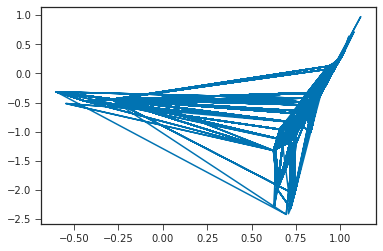

In [129]:
plt.plot(cv_trajs[1182][:, 14], cv_trajs[1182][:, 15])

# States 

In [34]:
dist = cv_arr[:, 0]
rot = cv_arr[:, 1]
tic1 = cv_arr[:, 14]
tic2 = cv_arr[:, 15]
sb5 = cv_arr[:, 5]  # R2-D186
sb6 = cv_arr[:, 6]  # R3-D186
sb7 = cv_arr[:, 7]  # R4-D186
sb3 = cv_arr[:, 3]  # R2-D129


# ellipse centered at (-4.174, -50.8) with radii 1.1 nm and 16 deg (2 sigma in each direction) for down state
# take points where TIC 1 < 1.2 and R2/R3-D186 distance < 0.5/0.55 (lower salt bridges)
dist_ax_down = (dist + 4.174) / 1.1
rot_ax_down = (rot + 50.8) / 16
down_ids = (
    ((dist_ax_down ** 2 + rot_ax_down ** 2) < 1)
    & (sb5 < 0.5)
    & (sb6 < 0.55)
    & (sb3 > 0.6)
    & (tic1 < 1.2)
).nonzero()[0]

# ellipse centered at (0, 0) with radii 0.84 nm and 7.6 deg (2 sigma in each direction) for down state
# take points where TIC 2 > -1.0 and R3/R4-D186 salt bridges < 0.5/0.6 nm, R2-D186 > 1
up_ids = (
    (((dist / 0.84) ** 2 + (rot / 7.6) ** 2) < 1)
    & (sb6 < 0.5)
    & (sb7 < 0.6)
    & (sb5 > 1.0)
    & (tic2 > -1)
).nonzero()[0]

In [35]:
mask = np.ones(len(cv_arr), dtype=bool)
mask[down_ids] = False
mask[up_ids] = False

# len(**_ids) is number of points in each state
down = data[down_ids]
up = data[up_ids]
other = data[mask]

# split CV data
down_cvs = cv_arr[down_ids]
up_cvs = cv_arr[up_ids]
other_cvs = cv_arr[mask]

In [36]:
assert (len(down) + len(up) + len(other)) == len(cv_arr)
print(f"Number of down structures:  {len(down)}")
print(f"Number of up structures:   {len(up)}")
print(f"Number of other structures: {len(other)}")

Number of down structures:  36886
Number of up structures:   91083
Number of other structures: 5872031


## plot new states 

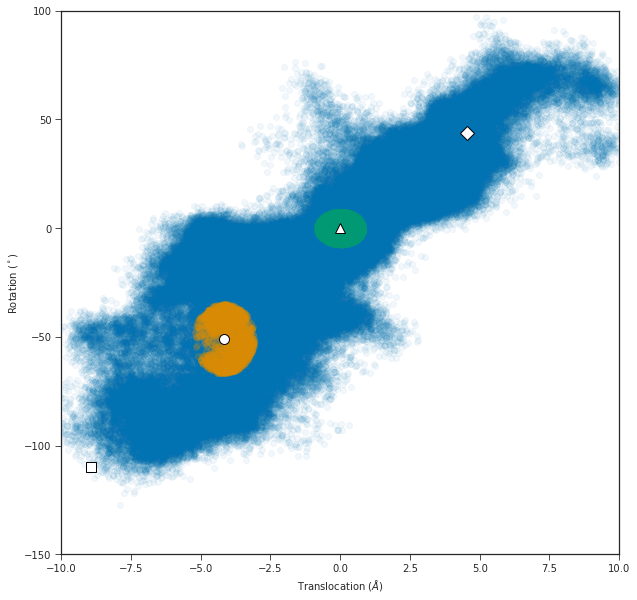

In [100]:
f, ax = plt.subplots(figsize=(10, 10))
ax.scatter(*other_cvs[::20, :2].T, alpha=0.05)
for cv_group in (down_cvs, up_cvs):
    ax.scatter(*cv_group[::20, :2].T, alpha=0.2)
util.format_cvs(ax)

# Basis set construction (feat3) 

In [37]:
guess_down = np.zeros_like(data)
guess_down[down_ids] = 1
guessD = np.split(guess_down, traj_inds)
guess_up = np.zeros_like(data)
guess_up[up_ids] = 1
guessU = np.split(guess_up, traj_inds)

In [38]:
guess_down.shape

(6000000,)

In [80]:
# indicator basis
basisF_arr = np.zeros((len(cv_arr), 200))
basisL_arr = np.zeros((len(cv_arr), 200))
for i in range(200):
    basisF_arr[data == i, i] = 1
    basisL_arr[data == i, i] = 1

# no boundary conditions for COM calculations
# enforce boundary conditions
basisF_arr[down_ids] = 0
basisF_arr[up_ids] = 0

In [106]:
assert basisF_arr[down_ids].all() == 0
assert basisF_arr[up_ids].all() == 0

In [83]:
basisL_arr[up_ids].all()

False

In [107]:
# remove bases which are completely 0 (i.e. entirely contained in A U B)
nonzero = np.where(np.sum(basisF_arr, axis=0) > 0)[0]

basisF_arr = basisF_arr[:, nonzero]

In [108]:
basisF_arr.shape

(6000000, 200)

In [67]:
basisF = np.split(basisF_arr, traj_inds)
basisL = np.split(basisL_arr, traj_inds)

In [69]:
print(len(basisF), basisF[0].shape)
print(len(basisL), basisL[0].shape)

1237 (3000, 200)
1237 (3000, 200)


In [24]:
# unit is 0.1 ps, up to 100 ns
lags = [1, 2, 5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000, 2000]

## Compute change of measure

In [70]:
weights_feat3 = []
for lag in lags:
    print(f"Computing change of measure for lag {lag}")
    com = extq.dga.reweight(basisL, lag)
    weights_feat3.append(com)

Computing change of measure for lag 1
Computing change of measure for lag 2
Computing change of measure for lag 5
Computing change of measure for lag 10
Computing change of measure for lag 20
Computing change of measure for lag 30
Computing change of measure for lag 40
Computing change of measure for lag 50
Computing change of measure for lag 100
Computing change of measure for lag 200
Computing change of measure for lag 300
Computing change of measure for lag 400
Computing change of measure for lag 500
Computing change of measure for lag 1000
Computing change of measure for lag 2000


In [71]:
np.save("../../data/coms_feat3_ind200_fix.npy", weights_feat3)

/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [24]:
weights_feat3 = np.load("../../data/coms_feat3_ind200_fix.npy", allow_pickle=True)

# PMFs 

## Translocation/rotation projection 

In [132]:
dens_all = []
dist_trajs = [traj[:, 0] for traj in cv_trajs]
rot_trajs = [traj[:, 1] for traj in cv_trajs]
xlim = np.linspace(-10, 10, 50)
ylim = np.linspace(-150, 100, 50)

for (com, lag) in zip(weights_feat3, lags):
    print(f"Density for lag {lag}")
    dens_all.append(extq.projection.density2d(dist_trajs, rot_trajs, com, xlim, ylim))

Density for lag 1
Density for lag 2
Density for lag 5
Density for lag 10
Density for lag 20
Density for lag 30
Density for lag 40
Density for lag 50
Density for lag 100
Density for lag 200
Density for lag 300
Density for lag 400
Density for lag 500
Density for lag 1000
Density for lag 2000


/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


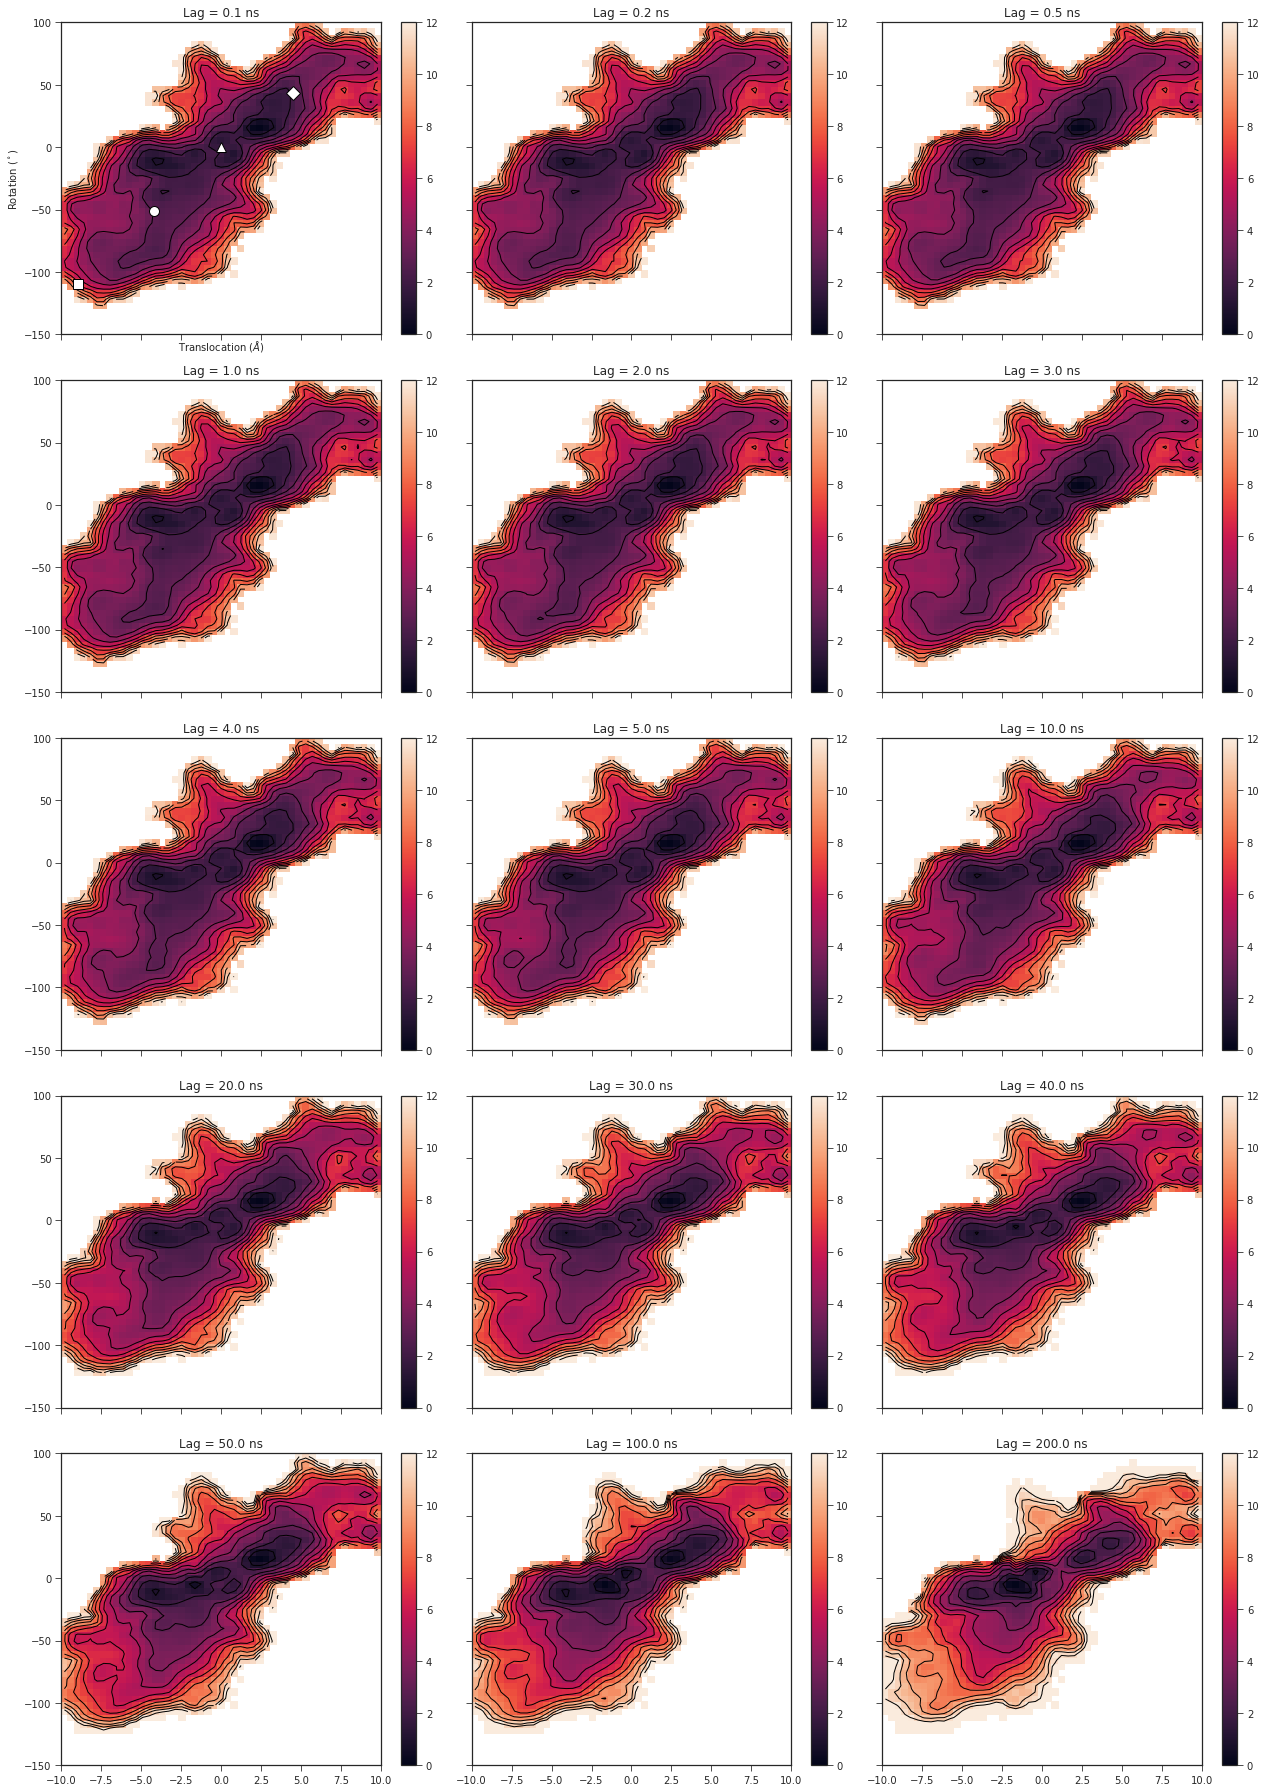

In [133]:
clines = np.linspace(0, 12, 13)
centerx = (xlim[1:] + xlim[:-1]) / 2
centery = (ylim[1:] + ylim[:-1]) / 2

f, axes = plt.subplots(5, 3, figsize=(18, 25), sharex=True, sharey=True)
for i, (lag, ax, pmf) in enumerate(zip(lags, axes.flat, dens_all)):
    # calculate energy difference against minimum
    min_energy = np.min(-np.log(pmf[np.nonzero(pmf)]))
    diff = -np.log(pmf.T) - min_energy
    h = ax.pcolor(xlim, ylim, diff, cmap="rocket", vmax=12)
    plt.colorbar(h, ax=ax)
    ax.contour(
        centerx,
        centery,
        diff,
        levels=clines,
        colors="black",
        linestyles="solid",
        linewidths=1,
    )
    ax.set_title(f"Lag = {lag * 0.1} ns")

util.format_cvs(axes[0][0])
f.tight_layout()
# plt.savefig('../../fig/pmfs/feat3_ind200_pmfs_ds', dpi=400)

## Projection onto salt bridge distances (1 ns)

In [25]:
from itertools import combinations

In [26]:
dens_all_sb = []
xlim = np.linspace(0.3, 2.5, 50)
ylim = np.linspace(0.3, 2.5, 50)

for (sb1, sb2) in combinations(range(3, 7), 2):
    sb1_trajs = [traj[:, sb1] for traj in cv_trajs]
    sb2_trajs = [traj[:, sb2] for traj in cv_trajs]
    dens_all_sb.append(
        extq.projection.density2d(sb1_trajs, sb2_trajs, weights_feat3[3], xlim, ylim)
    )

In [26]:
feat2_models = np.load("../../data/models_feat2.npy")

/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


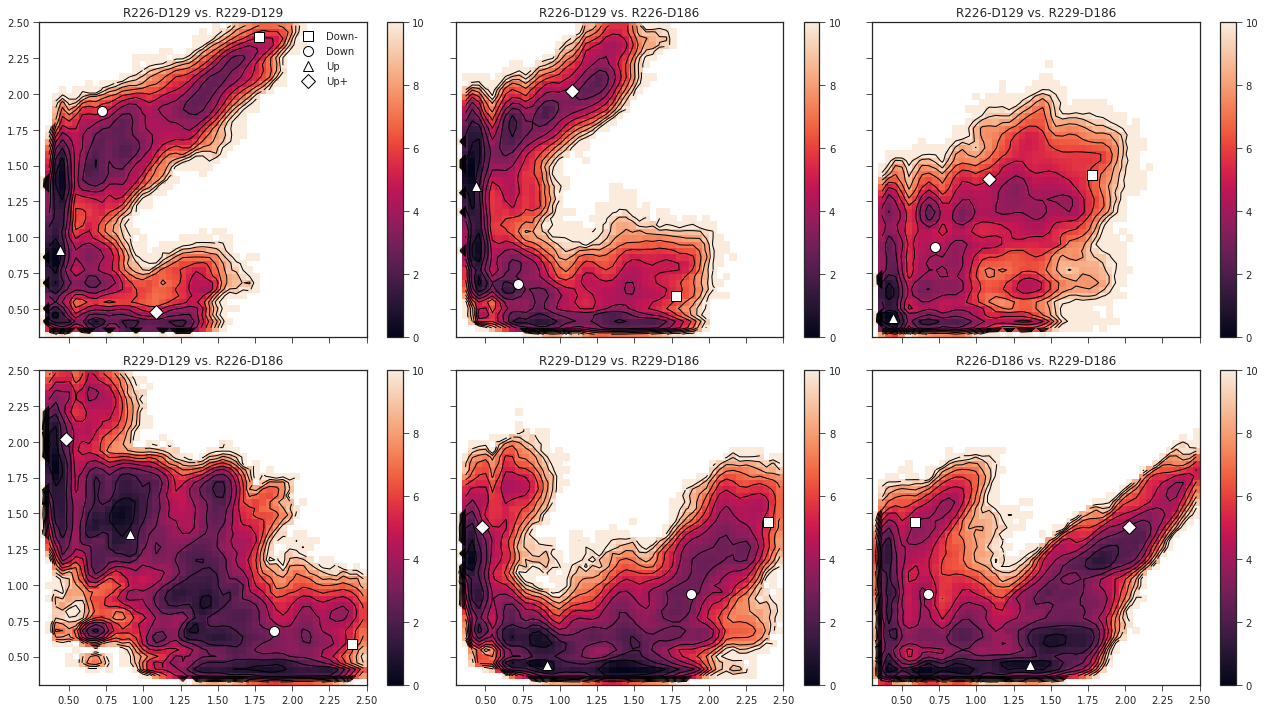

In [75]:
clines = np.linspace(0, 10, 11)
xlim = np.linspace(0.3, 2.5, 50)
ylim = np.linspace(0.3, 2.5, 50)
centerx = (xlim[1:] + xlim[:-1]) / 2
centery = (ylim[1:] + ylim[:-1]) / 2

f, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
for ((sb1, sb2), ax, pmf) in zip(combinations(range(3, 7), 2), axes.flat, dens_all_sb):
    # calculate energy difference against minimum
    min_energy = np.min(-np.log(pmf[np.nonzero(pmf)]))
    diff = -np.log(pmf.T) - min_energy
    h = ax.pcolor(xlim, ylim, diff, cmap="rocket", vmax=10)
    plt.colorbar(h, ax=ax)
    ax.contour(
        centerx,
        centery,
        diff,
        levels=clines,
        colors="black",
        linestyles="solid",
        linewidths=1,
    )
    ax.set_title(f"{names[sb1]} vs. {names[sb2]}")

util.plot_models(axes[0][0], feat2_models[:, 42:49:6])  # indexes 42 and 48
util.plot_models(axes[0][1], feat2_models[:, 42:48:5])  # 42 and 47
util.plot_models(axes[0][2], feat2_models[:, 42:54:11])  # 42 and 53
util.plot_models(axes[1][0], feat2_models[:, 48:46:-1])  # indexes 48 and 47
util.plot_models(axes[1][1], feat2_models[:, 48:54:5])  # 48 and 53
util.plot_models(axes[1][2], feat2_models[:, 47:54:6])  # 47 and 53
axes[0][0].legend(["Down-", "Down", "Up", "Up+"])
f.tight_layout()
# plt.savefig('../../fig/pmfs/feat3_ind200fix_sb_light.png', dpi=300)

###  Check densities for seeding new trajectories

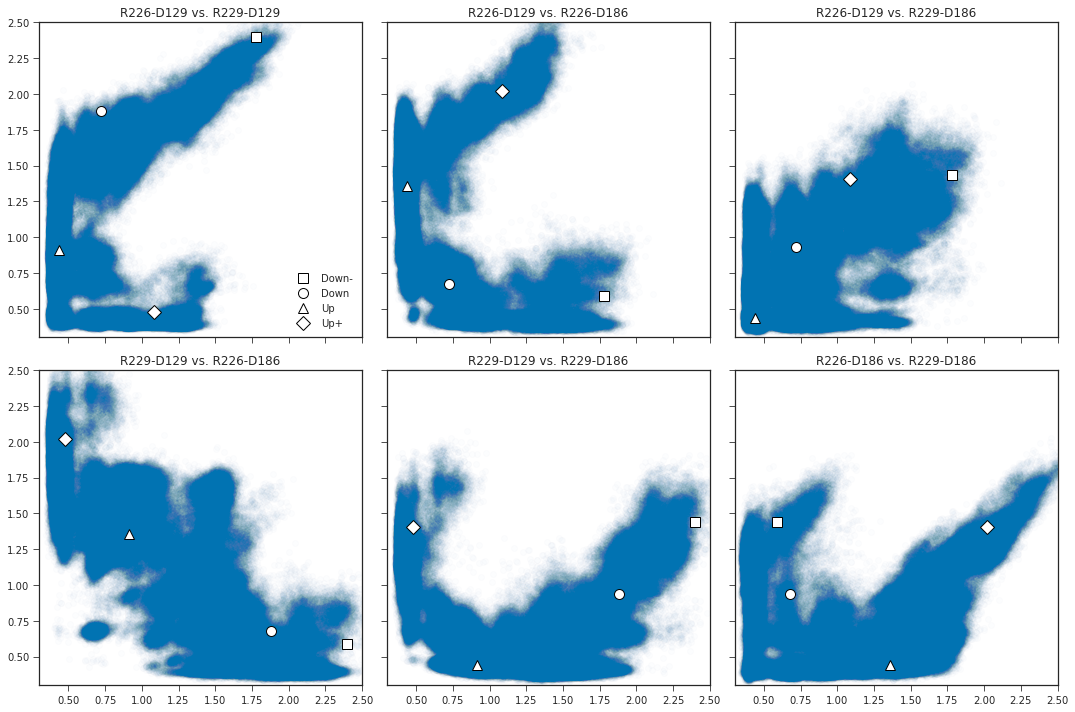

In [173]:
f, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)
for ((sb1, sb2), ax) in zip(combinations(range(3, 7), 2), axes.flat):
    ax.scatter(cv_arr[::10, sb1], cv_arr[::10, sb2], alpha=0.01)
    ax.set_title(f"{names[sb1]} vs. {names[sb2]}")

axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
util.plot_models(axes[0][0], feat2_models[:, 42:49:6])  # indexes 42 and 48
util.plot_models(axes[0][1], feat2_models[:, 42:48:5])  # 42 and 47
util.plot_models(axes[0][2], feat2_models[:, 42:54:11])  # 42 and 53
util.plot_models(axes[1][0], feat2_models[:, 48:46:-1])  # indexes 48 and 47
util.plot_models(axes[1][1], feat2_models[:, 48:54:5])  # 48 and 53
util.plot_models(axes[1][2], feat2_models[:, 47:54:6])  # 47 and 53
axes[0][0].legend(["Down-", "Down", "Up", "Up+"])
f.tight_layout()

In [30]:
# points to seed for ABMD/more simulations
points = []
for i in np.arange(0.6, 1.05, 0.1):
    points.append((i, 1.0))
for i in np.arange(0.6, 1.05, 0.1):
    for j in np.arange(0.8, 1.0, 0.1):
        points.append((i, j))
for i in np.arange(0.8, 1.05, 0.1):
    for j in np.arange(0.6, 0.8, 0.1):
        points.append((i, j))

In [31]:
len(points)

24

In [32]:
feat2_models[:, sb_ids]

array([[0.9302045 , 1.7783656 , 2.399068  , 0.589832  , 1.4369651 ,
        2.003365  ],
       [0.47516656, 0.7199738 , 1.878843  , 0.6756886 , 0.9350806 ,
        1.3465077 ],
       [1.1093363 , 0.43770736, 0.91152084, 1.3578467 , 0.43891427,
        0.37013218],
       [1.8125532 , 1.0850425 , 0.4795601 , 2.0220351 , 1.4036593 ,
        0.45749736]], dtype=float32)

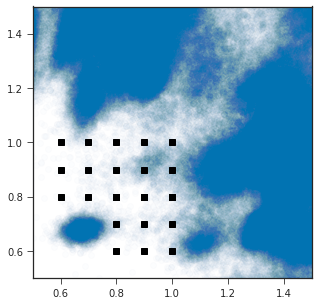

In [33]:
f, ax = plt.subplots(figsize=(5, 5))
ax.scatter(cv_arr[::10, 4], cv_arr[::10, 5], alpha=0.01)
ax.set(xlim=[0.5, 1.5], ylim=[0.5, 1.5])
for (x, y) in points:
    ax.plot(x, y, "sk")

In [34]:
for p in points:
    dist = np.linalg.norm(cv_arr[::500, 4:6] - np.array(p), axis=1)
    ids = dist.argsort()
    frames = []
    #     for x in ids[:10]:
    #         frames.append(str(util.frame(x * 500)))
    #     print(','.join(frames))
    print(f"{util.frame(ids[0] * 500)}: {cv_arr[ids[0] * 500, 4:6]}")

(886, 1500): [0.63575238 0.9978807 ]
(852, 2000): [0.67667878 1.02886403]
(198, 500): [0.84827501 1.00422823]
(198, 500): [0.84827501 1.00422823]
(927, 0): [0.99853379 0.98343742]
(1230, 1500): [0.6701262  0.80594361]
(1230, 1000): [0.68558961 0.94781286]
(1230, 1500): [0.6701262  0.80594361]
(281, 500): [0.70802122 0.89211047]
(280, 500): [0.8092832  0.86359841]
(280, 500): [0.8092832  0.86359841]
(1182, 68500): [0.90654737 0.7909779 ]
(468, 500): [0.89268023 0.89356643]
(1209, 3000): [0.96715981 0.83361441]
(827, 500): [0.99110585 0.90655971]
(633, 1500): [0.77797848 0.6651141 ]
(399, 1000): [0.77045792 0.70740157]
(280, 500): [0.8092832  0.86359841]
(1230, 3000): [0.90000057 0.66456765]
(277, 1000): [0.89891851 0.71072811]
(1182, 68500): [0.90654737 0.7909779 ]
(1230, 6000): [1.00108349 0.61837614]
(726, 500): [0.99926621 0.71748579]
(1209, 3000): [0.96715981 0.83361441]


### Check which trajectory starting points are good 

#### R4-D129 vs R3-D186

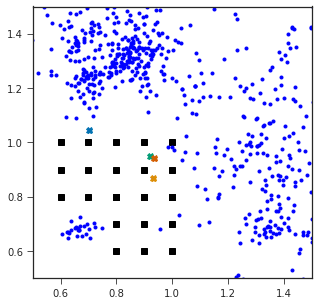

In [35]:
inits = np.asarray([traj[0, :] for traj in cv_trajs])
f, ax = plt.subplots(figsize=(5, 5))
# ax.scatter(cv_arr[::10, 4], cv_arr[::10, 5], alpha=0.01)
ax.set(xlim=[0.5, 1.5], ylim=[0.5, 1.5])
for (x, y) in points:
    ax.plot(x, y, "sk")
for (x, y) in inits[:, 4:6]:
    ax.plot(x, y, ".b")
ax.plot(*inits[240, 4:6], "X")
ax.plot(*inits[828, 4:6], "X")
ax.plot(*inits[928, 4:6], "X")
ax.plot(*inits[468, 4:6], "X")

In [36]:
# which is trajectory near 0.7, 1.0?
dist = (inits[:, 4] - 0.7) ** 2 + (inits[:, 5] - 1.0) ** 2
print(dist.argsort())
# which near 0.9, 0.9?
dist = (inits[:, 4] - 0.9) ** 2 + (inits[:, 5] - 0.9) ** 2
print(dist.argsort())
# near 0.8, 0.8?
dist = (inits[:, 4] - 0.8) ** 2 + (inits[:, 5] - 0.8) ** 2
print(dist.argsort())

[ 240  880  545 ... 1160  689   11]
[ 828  928  468 ... 1160  689   11]
[ 633  197  108 ... 1162  689   11]


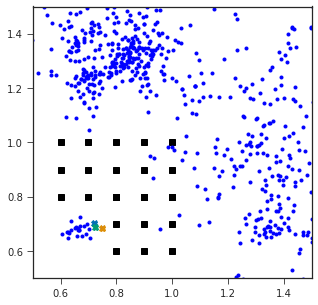

In [54]:
inits = np.asarray([traj[0, :] for traj in cv_trajs])
f, ax = plt.subplots(figsize=(5, 5))
# ax.scatter(cv_arr[::10, 4], cv_arr[::10, 5], alpha=0.01)
ax.set(xlim=[0.5, 1.5], ylim=[0.5, 1.5])
for (x, y) in points:
    ax.plot(x, y, "sk")
for (x, y) in inits[:, 4:6]:
    ax.plot(x, y, ".b")
ax.plot(*inits[633, 4:6], "X")
ax.plot(*inits[197, 4:6], "X")
ax.plot(*inits[108, 4:6], "X")

In [42]:
inits[828]

array([ 0.428     , -4.701     ,  0.82126814,  0.62354636,  0.93253744,
        0.86776865,  0.41249257,  0.53188825,  2.79322267,  1.48118711,
        0.85557771,  0.56453949,  1.13377321, -1.        ,  0.07047261,
       -0.66003308, -0.29499393,  0.3645497 ])

In [37]:
new_points = []
for i in np.arange(1.0, 1.8, 0.1):
    new_points.append((0.55, i))
for i in np.arange(0.65, 0.95, 0.1):
    for j in np.arange(1.0, 1.4, 0.1):
        new_points.append((i, j))
print(len(new_points))

20


#### R2-D129 vs R3-D129

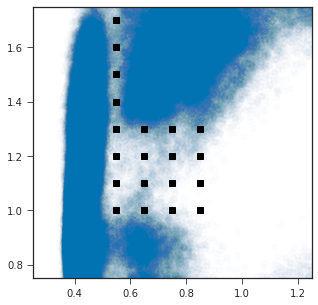

In [38]:
f, ax = plt.subplots(figsize=(5, 5))
ax.scatter(cv_arr[::10, 3], cv_arr[::10, 4], alpha=0.01)
ax.set(xlim=[0.25, 1.25], ylim=[0.75, 1.75])
for (x, y) in new_points:
    ax.plot(x, y, "sk")

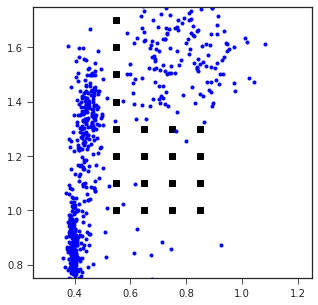

In [39]:
f, ax = plt.subplots(figsize=(5, 5))
ax.set(xlim=[0.25, 1.25], ylim=[0.75, 1.75])
for (x, y) in new_points:
    ax.plot(x, y, "sk")
for (x, y) in inits[:, 3:5]:
    ax.plot(x, y, ".b")

In [40]:
# which is trajectory near 0.7, 1.2?
dist = (inits[:, 3] - 0.7) ** 2 + (inits[:, 4] - 1.2) ** 2
print(dist.argsort())
# # which near 0.9, 0.9?
# dist = (inits[:, 3] - 0.9)**2 + (inits[:, 4] - 0.9)**2
# print(dist.argsort())
# # near 0.8, 0.8?
# dist = (inits[:, 4] - 0.8)**2 + (inits[:, 5] - 0.8)**2
# print(dist.argsort())

[ 238 1219  196 ...   11  587  689]


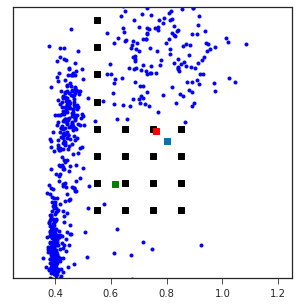

In [45]:
f, ax = plt.subplots(figsize=(5, 5))
ax.set(xlim=[0.25, 1.25], ylim=[0.75, 1.75])
for (x, y) in new_points:
    ax.plot(x, y, "sk")
for (x, y) in inits[:, 3:5]:
    ax.plot(x, y, ".b")
ax.plot(*inits[238, 3:5], "sr")
ax.plot(*inits[196, 3:5], "sg")
ax.plot(*inits[1219, 3:5], "s", "purple")

In [46]:
inits[196, 3:5]

array([0.6154868 , 1.09590042])

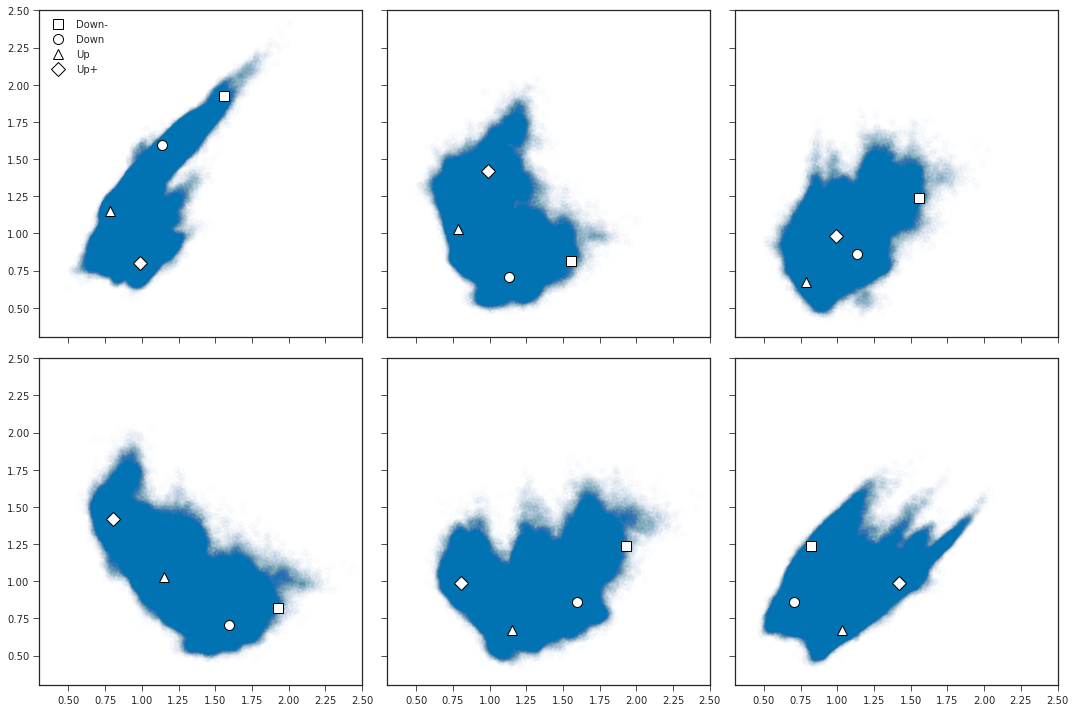

In [183]:
# c alpha distances
f, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)
for ((sb1, sb2), ax) in zip(combinations([12, 18, 17, 23], 2), axes.flat):
    ax.scatter(sb_data_arr[::10, sb1], sb_data_arr[::10, sb2], alpha=0.01)
#     ax.set_title(f'{names[sb1]} vs. {names[sb2]}')

axes[0][0].set(xlim=[0.3, 2.5], ylim=[0.3, 2.5])
util.plot_models(axes[0][0], feat2_models[:, 12:19:6])  # indexes 42 and 48
util.plot_models(axes[0][1], feat2_models[:, 12:18:5])  # 42 and 47
util.plot_models(axes[0][2], feat2_models[:, 12:24:11])  # 42 and 53
util.plot_models(axes[1][0], feat2_models[:, 18:16:-1])  # indexes 48 and 47
util.plot_models(axes[1][1], feat2_models[:, 18:24:5])  # 48 and 53
util.plot_models(axes[1][2], feat2_models[:, 17:24:6])  # 47 and 53
axes[0][0].legend(["Down-", "Down", "Up", "Up+"])
f.tight_layout()

### Analyze PMFs

In [149]:
# narrow trough on left side of plot 1 (small R1-D129 distance and increasing R2-D129 distance)
# points near (0.45, 1.45)
ids = ((cv_arr[:, 3] - 0.45) ** 2 + (cv_arr[:, 4] - 1.45) ** 2).argsort()
for ix in ids[:10]:
    print(f"{util.frame(ix)}: {cv_arr[ix, 3:5]}")

(93, 929): [0.44997105 1.45000899]
(726, 2352): [0.45000577 1.44996774]
(363, 287): [0.45012334 1.44996619]
(1198, 9430): [0.45010778 1.45006907]
(1220, 6762): [0.44994441 1.44988394]
(1181, 40194): [0.45007893 1.44989657]
(1182, 44601): [0.44988999 1.4499197 ]
(1181, 28732): [0.45016783 1.44996738]
(570, 491): [0.44985878 1.45009983]
(466, 2379): [0.4498376  1.45007086]


In [150]:
# points near (0.7, 1.5) (basin near down state)
ids = ((cv_arr[:, 3] - 0.7) ** 2 + (cv_arr[:, 4] - 1.5) ** 2).argsort()
for ix in ids[:10]:
    print(f"{util.frame(ix)}: {cv_arr[ix, 3:5]}")

(1179, 24738): [0.69988936 1.49983776]
(1180, 23567): [0.70014352 1.49983013]
(1011, 9485): [0.69961846 1.50007677]
(1151, 9146): [0.70008934 1.4995954 ]
(1104, 935): [0.69978637 1.50041676]
(1076, 4036): [0.70026416 1.500471  ]
(66, 1849): [0.70057249 1.50030339]
(1121, 8237): [0.70026493 1.50061464]
(824, 2): [0.70057702 1.49963808]
(1018, 6199): [0.69970065 1.50065124]


R2 stuck often inside the plug, which accounts for larger D129 distance: strange that this would be energy minimum

In [158]:
# small basin upper right of plot 4 (basin off pathway between down and up states)
ids = ((cv_arr[:, 4] - 1.55) ** 2 + (cv_arr[:, 5] - 1.7) ** 2).argsort()
for ix in ids[:10]:
    print(f"{util.frame(ix)}")

(1181, 31233)
(1181, 57165)
(1181, 81466)
(1205, 2446)
(1204, 9393)
(1220, 9566)
(1226, 9368)
(1181, 66522)
(1229, 7495)
(1181, 66316)


In [159]:
# small basin lower left of plot 4 (basin off pathway between down and up states)
ids = ((cv_arr[:, 4] - 0.65) ** 2 + (cv_arr[:, 5] - 0.7) ** 2).argsort()
for ix in ids[:10]:
    print(f"{util.frame(ix)}")

(631, 1290)
(607, 1654)
(633, 556)
(633, 831)
(675, 2136)
(633, 953)
(283, 956)
(229, 2838)
(276, 128)
(631, 740)


Both R2 and R3 bunched near the hydrophobic plug

In [160]:
# small maximum lower left of plot 4 (basin off pathway between down and up states)
ids = ((cv_arr[:, 4] - 0.85) ** 2 + (cv_arr[:, 5] - 0.8) ** 2).argsort()
for ix in ids[:10]:
    print(f"{util.frame(ix)}")

(1182, 68446)
(827, 1655)
(1182, 70682)
(280, 529)
(827, 963)
(1182, 67301)
(283, 1722)
(468, 1975)
(283, 1627)
(1182, 67177)


These appear quite similar to the one above, unclear why it would be higher in energy

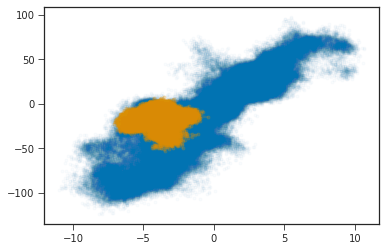

In [170]:
plt.plot(*cv_arr[::20, :2].T, ".", alpha=0.02)
plt.plot(*cv_trajs[1182][:, :2].T, ".-", alpha=0.2)

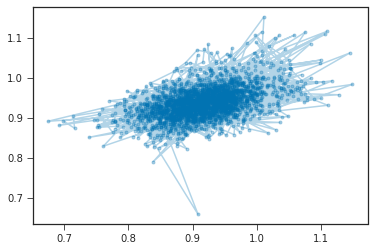

In [180]:
plt.plot(*cv_trajs[468][:, 4:6].T, ".-", alpha=0.3)

In [177]:
# hill lower left of plot 4 (off pathway between down and up states)
ids = ((cv_arr[:, 4] - 0.8) ** 2 + (cv_arr[:, 5] - 1.0) ** 2).argsort()
for ix in ids[:10]:
    print(f"{util.frame(ix)}")

(728, 31)
(1034, 8371)
(1034, 8245)
(626, 415)
(1230, 1221)
(197, 1898)
(626, 668)
(1034, 9228)
(1230, 1789)
(728, 149)


In [178]:
# hill lower left of plot 4 (off pathway between down and up states)
ids = ((cv_arr[:, 4] - 0.9) ** 2 + (cv_arr[:, 5] - 0.7) ** 2).argsort()
for ix in ids[:10]:
    print(f"{util.frame(ix)}")

(277, 2964)
(1230, 4829)
(276, 2085)
(631, 2794)
(276, 1666)
(631, 2806)
(1230, 4790)
(108, 123)
(399, 1913)
(1230, 3265)


Maybe here channel of high energy is R3 lodged inside hydrophobic plug

In [179]:
# hill lower left of plot 4 (off pathway between down and up states)
ids = ((cv_arr[:, 4] - 1.0) ** 2 + (cv_arr[:, 5] - 1.0) ** 2).argsort()
for ix in ids[:10]:
    print(f"{util.frame(ix)}")

(827, 748)
(1195, 7443)
(468, 2452)
(1209, 2154)
(188, 2873)
(727, 590)
(821, 1163)
(198, 1203)
(1063, 9590)
(468, 2250)


# Committor calculations 

## all committors 

In [36]:
in_domain = np.split(mask, traj_inds)
q_downup, qb_downup, q_updown, qb_updown = [], [], [], []
for (lag, com) in zip(lags, weights_feat3):
    print(f"Calculating committors for lag {lag}")
    q_downup.append(extq.dga.forward_committor(basisF, com, in_domain, guessU, lag))
    qb_downup.append(extq.dga.backward_committor(basisF, com, in_domain, guessD, lag))
    q_updown.append(extq.dga.forward_committor(basisF, com, in_domain, guessD, lag))
    qb_updown.append(extq.dga.backward_committor(basisF, com, in_domain, guessU, lag))

Calculating committors for lag 1
Calculating committors for lag 2
Calculating committors for lag 5
Calculating committors for lag 10
Calculating committors for lag 20
Calculating committors for lag 30
Calculating committors for lag 40
Calculating committors for lag 50
Calculating committors for lag 100
Calculating committors for lag 200
Calculating committors for lag 300
Calculating committors for lag 400
Calculating committors for lag 500
Calculating committors for lag 1000
Calculating committors for lag 2000
